In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("laptops.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


## Data Cleaning

In [6]:
df.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [9]:
df.Ram = df.Ram.str.replace('GB','')

In [10]:
df.Weight = df.Weight.str.replace('kg','')

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [12]:
df.Ram = df.Ram.astype('int')
df.Weight = df.Weight.astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


## EDA

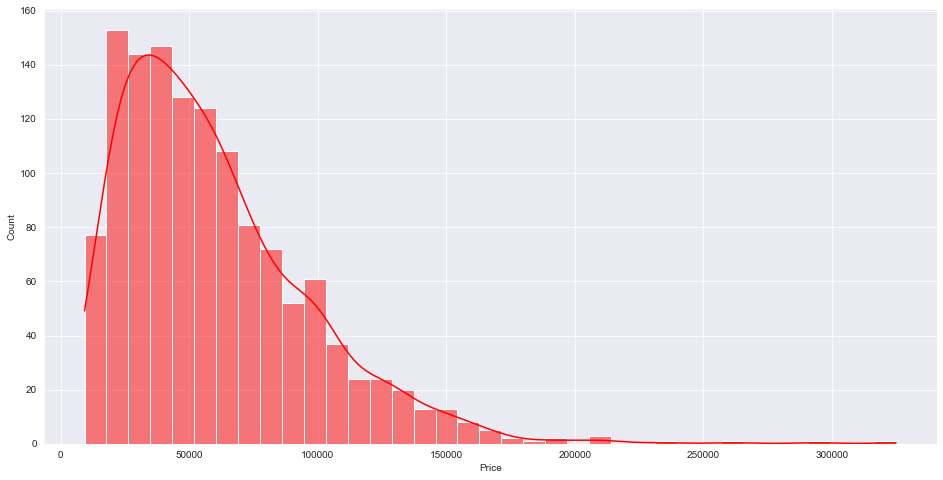

In [16]:
plt.figure(figsize=(16,8))
sns.histplot(df['Price'],kde=True,color="red")
sns.set_style("darkgrid")
plt.show()

### Insights
- data is skewed 
- more laptops in less price range
- less laptops in very high price range

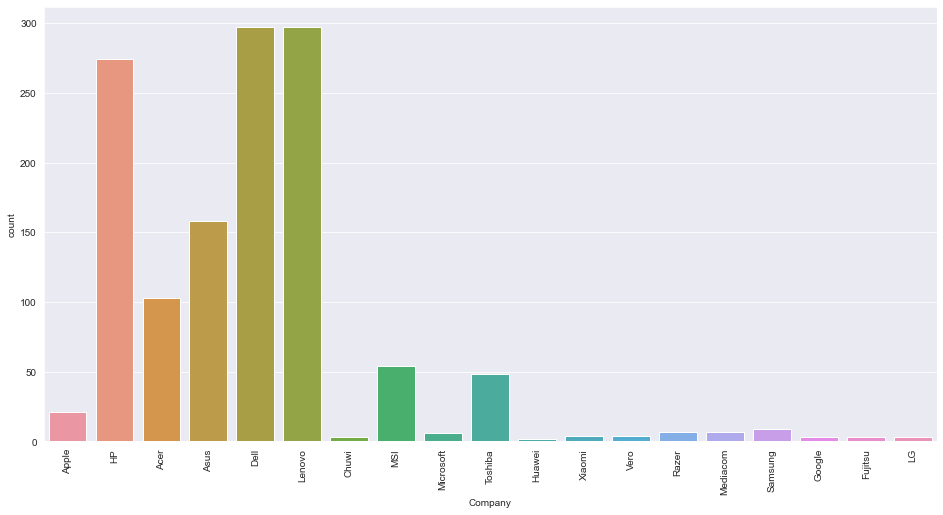

In [19]:
plt.figure(figsize=(16,8))
sns.countplot(x=df.Company)
plt.xticks(rotation='vertical')
plt.show()

### Insights
- HP,Lenovo,Dell produce more range of laptops 

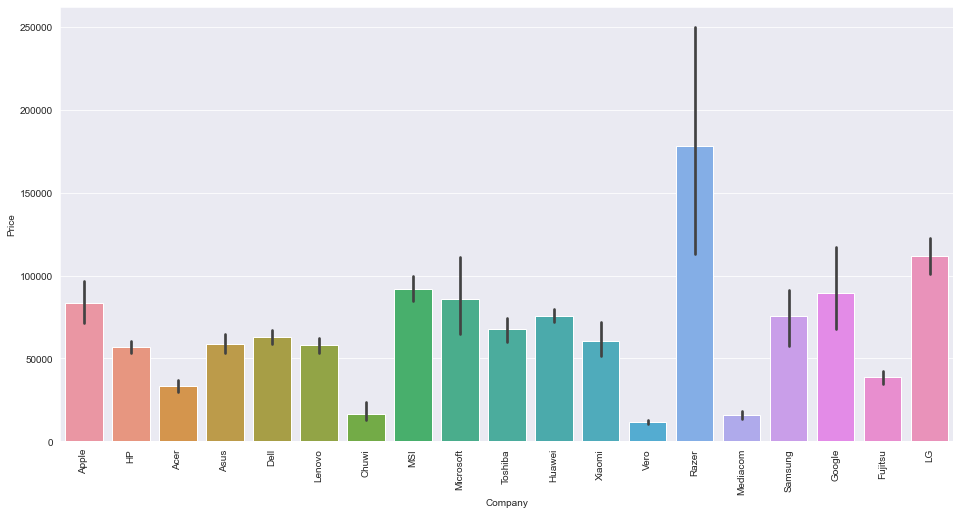

In [20]:
plt.figure(figsize=(16,8))
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Insights
- Razer produces laptops with highest ranges in average
- HP,Lenovo,Asus and Dell produces laptops in similar price ranges

<AxesSubplot:>

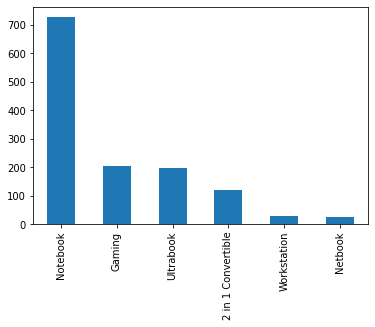

In [17]:
df.TypeName.value_counts().plot(kind='bar')

### Insights
- Notebook laptops are most popular
- Netbooks aren't sold that much


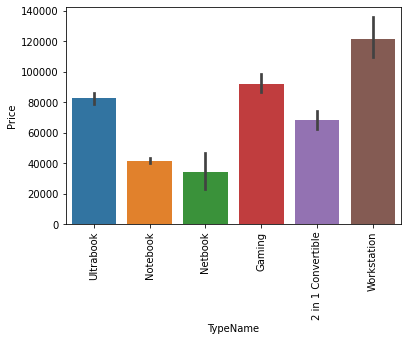

In [18]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Insights
- Workstation laptops are mostly expensive followed by gaming laptops and ultrabooks
- notebook lies in mid-range and netbooks are cheapest available laptops

<AxesSubplot:xlabel='Inches', ylabel='Price'>

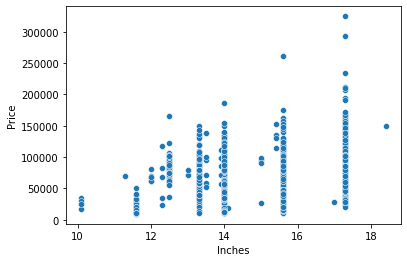

In [19]:
sns.scatterplot(x=df.Inches,y=df.Price)

In [20]:
df.Inches.value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

### Insights
- most laptops are available in screen sizes of 15.6,14,13.3 and 17.3

## Data Preprocessing

In [21]:
df.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [22]:
df['Touchscreen'] = df["ScreenResolution"].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [23]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
924,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.37,97236.00,1
986,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.04,42943.68,0
107,Asus,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.30,63563.04,0
973,Toshiba,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.95,62870.40,0
217,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.63,54931.68,0


<AxesSubplot:xlabel='Touchscreen', ylabel='count'>

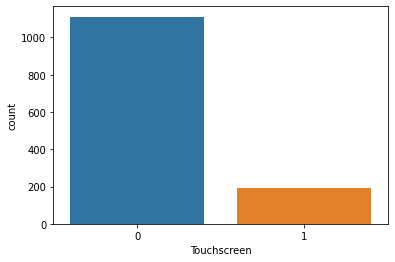

In [24]:
sns.countplot(x=df.Touchscreen)

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

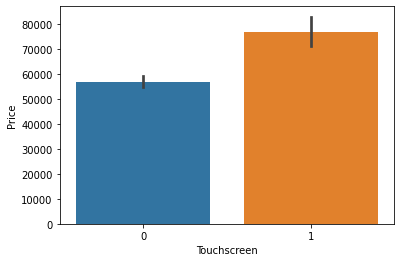

In [25]:
sns.barplot(x=df.Touchscreen,y=df.Price)

In [26]:
df['IPS'] = df["ScreenResolution"].apply(lambda x:1 if 'IPS' in x else 0)

In [27]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<AxesSubplot:xlabel='IPS', ylabel='count'>

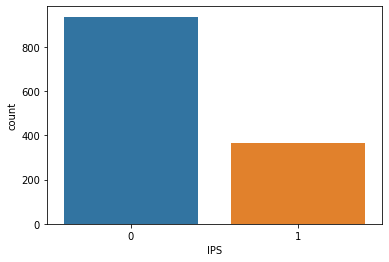

In [28]:
sns.countplot(x=df.IPS)

<AxesSubplot:xlabel='IPS', ylabel='Price'>

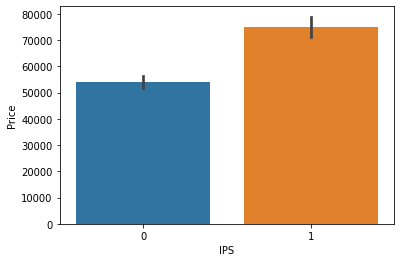

In [29]:
sns.barplot(x=df.IPS,y=df.Price)

In [30]:
new = df.ScreenResolution.str.split('x',expand=True)

In [31]:
df["ResX"] = new[0]
df["ResY"] = new[1]

In [32]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ResX,ResY
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [33]:
df['ResX'] = df['ResX'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [34]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ResX,ResY
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  ResX              1303 non-null   object 
 14  ResY              1303 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(9)
memory usage: 147.7+ KB


In [36]:
df.ResX = df.ResX.astype('int')
df.ResY = df.ResY.astype('int')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  ResX              1303 non-null   int32  
 14  ResY              1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [38]:
df.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
ResX           0.556529
ResY           0.552809
Name: Price, dtype: float64

In [39]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ResX,ResY
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [40]:
df['ppi'] = (((df['ResX']**2) + (df['ResY']**2))**0.5/df['Inches']).astype('float')

In [41]:
df.corr()["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
ResX           0.556529
ResY           0.552809
ppi            0.473487
Name: Price, dtype: float64

In [42]:
df.drop("ScreenResolution",axis=1,inplace=True)

In [43]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ResX,ResY,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [44]:
df.drop(columns=["Inches","ResX","ResY"],axis=1,inplace=True)

In [45]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [46]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [47]:
df.head()


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [48]:
df["Cpu Name"].value_counts()

Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD A6-S

In [49]:
def processor_name(name):
    if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3':
        return name
    else:
        if name.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'Amd Processor'

In [50]:
df['Cpu Brand'] = df['Cpu Name'].apply(processor_name)

In [51]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [52]:
df.drop('Cpu Name',axis=1,inplace=True)

In [53]:
df.tail()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1,1,157.350512,Intel Core i7
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,1,276.053530,Intel Core i7
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0,0,111.935204,Other Intel Processor
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0,0,100.454670,Intel Core i7
1302,Asus,Notebook,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0,0,100.454670,Other Intel Processor


<AxesSubplot:>

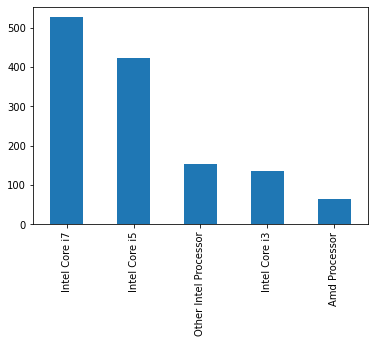

In [54]:
df["Cpu Brand"].value_counts().plot(kind='bar')

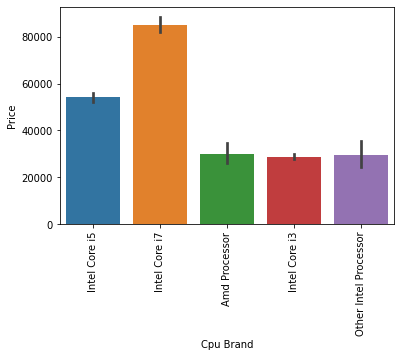

In [55]:
sns.barplot(x=df["Cpu Brand"],y=df["Price"])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
df.drop(columns=["Cpu"],inplace=True)

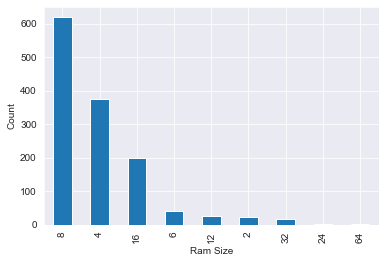

In [23]:
df.Ram.value_counts().plot(kind='bar')
plt.xlabel("Ram Size")
plt.ylabel("Count")
plt.show()

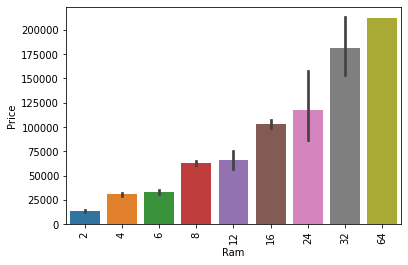

In [58]:
sns.barplot(x=df["Ram"],y=df["Price"])
plt.xticks(rotation='vertical')
plt.show()

In [59]:
df.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [24]:
df['Memory'] = df['Memory'].str.replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [61]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [62]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['first'] = df['first'].str.replace(r'\D', '',regex=True)


df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['second'] = df['second'].str.replace(r'\D', '',regex=True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [63]:
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
359,Dell,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.36,76030.56,0,0,157.350512,Intel Core i5,0,256,0,0
864,Dell,Ultrabook,16,512 SSD,Intel Iris Plus Graphics 640,Windows 10,1.29,119347.20,1,0,276.053530,Intel Core i7,0,512,0,0
825,Toshiba,Notebook,4,128 SSD,Intel HD Graphics 510,Windows 10,1.75,26586.72,0,0,111.935204,Other Intel Processor,0,128,0,0
832,Asus,Notebook,4,1000 HDD,Nvidia GeForce 920,Linux,2.10,27652.32,0,0,141.211998,Intel Core i5,1000,0,0,0
1174,Lenovo,Notebook,8,1000 HDD,Nvidia GeForce 940MX,No OS,2.20,37775.52,0,0,141.211998,Intel Core i7,1000,0,0,0
577,Lenovo,Gaming,32,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.60,141884.64,0,1,127.335675,Intel Core i7,1000,256,0,0
660,Dell,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.56,65481.12,0,0,157.350512,Intel Core i5,0,256,0,0
859,Lenovo,Notebook,4,1000 HDD,Intel HD Graphics 520,No OS,2.20,24988.32,0,0,141.211998,Intel Core i3,1000,0,0,0
603,MSI,Gaming,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 970M,Windows 10,4.14,117162.72,0,0,127.335675,Intel Core i7,1000,128,0,0
826,Asus,2 in 1 Convertible,8,256 SSD,Intel HD Graphics 620,Windows 10,1.10,72354.24,1,0,165.632118,Intel Core i5,0,256,0,0


In [64]:
df.drop("Memory",axis=1,inplace=True)

In [65]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [66]:
df.corr()["Price"]

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [67]:
df.drop(columns=["Hybrid","Flash_Storage"],inplace=True)

In [68]:
df["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [69]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [70]:
df['Gpu brand'].value_counts()


Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [71]:
df = df[df['Gpu brand'] != 'ARM']


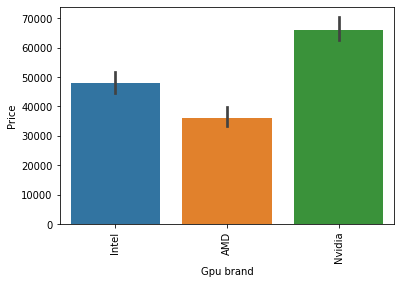

In [72]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [73]:
df.drop(columns=["Gpu"],inplace=True)

In [74]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [75]:
df["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

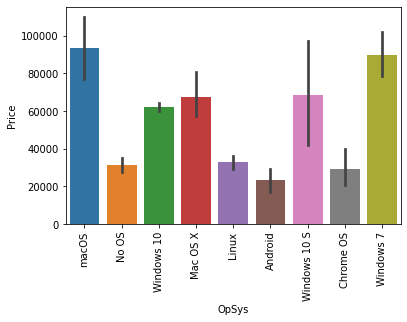

In [76]:
sns.barplot(x=df.OpSys,y=df.Price)
plt.xticks(rotation='vertical')
plt.show()

In [77]:
def get_os(os):
    if os == 'Windows 10' or os == 'Windows 7' or os == 'Windows 10 S':
        return 'Windows'
    else:
        if os == 'macOS' or os == 'Mac OS X':
            return 'Mac'
        else:
            return 'Other'

In [78]:
df['OS'] = df['OpSys'].apply(get_os)

In [79]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Other
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<AxesSubplot:>

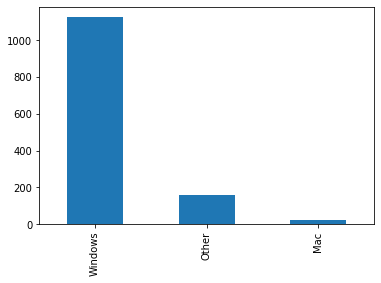

In [80]:
df.OS.value_counts().plot(kind='bar')

In [81]:
df.drop(columns=['OpSys'],inplace=True)

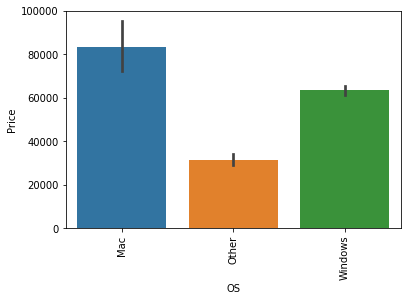

In [82]:
sns.barplot(x=df.OS,y=df.Price)
plt.xticks(rotation='vertical')
plt.show()

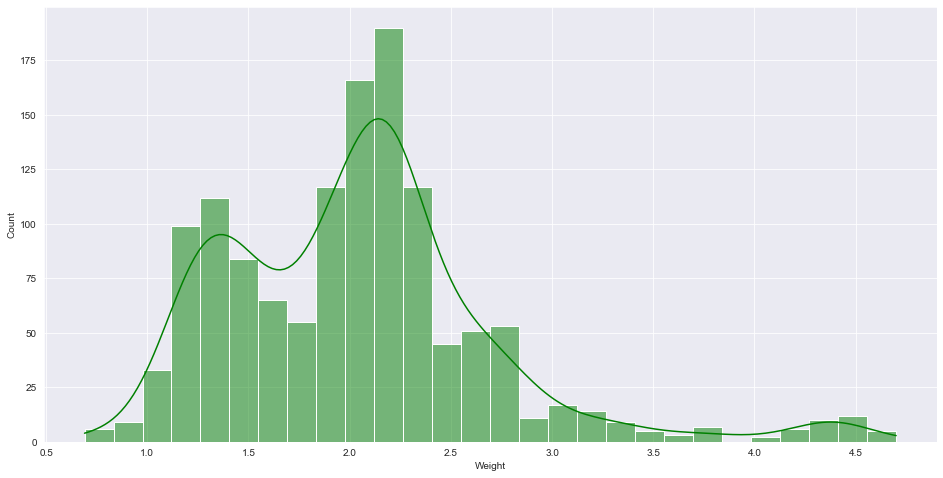

In [26]:
plt.figure(figsize=(16,8))
sns.histplot(df["Weight"],kde=True,color="green")
sns.set_style("darkgrid")
plt.show()

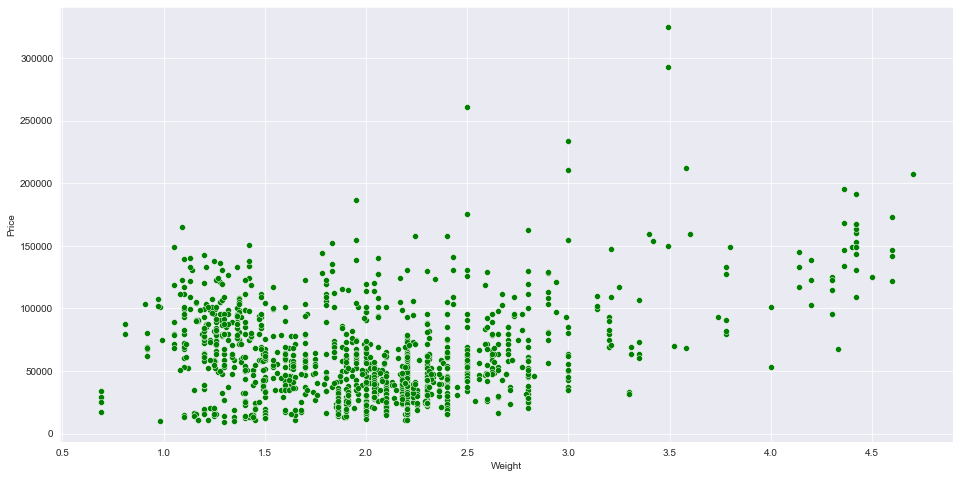

In [31]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df.Weight,y=df.Price,color="green")
plt.show()

In [85]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

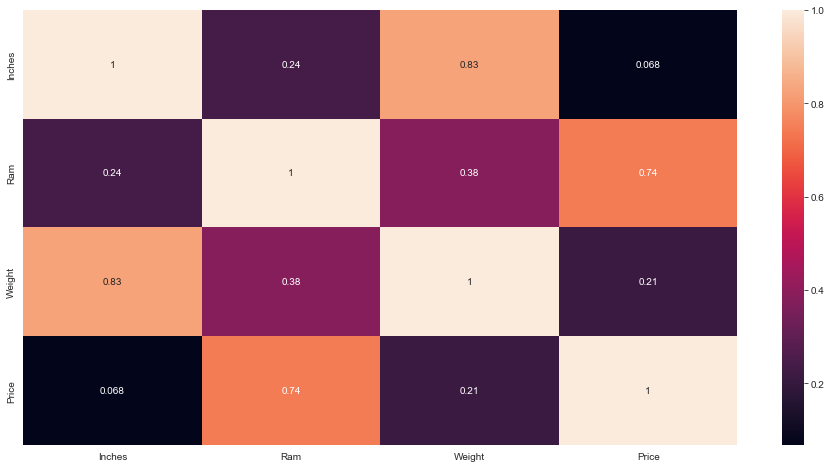

In [30]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


## Insights
- Inches is highly correlated to weight
- Ram is highly correlated to price

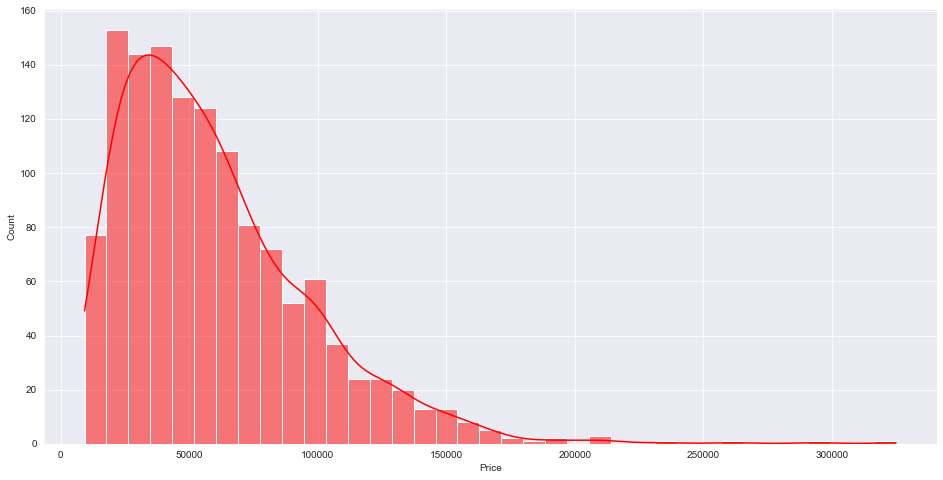

In [27]:
plt.figure(figsize=(16,8))
sns.histplot(df.Price,kde=True,color="red")
sns.set_style("darkgrid")
plt.show()

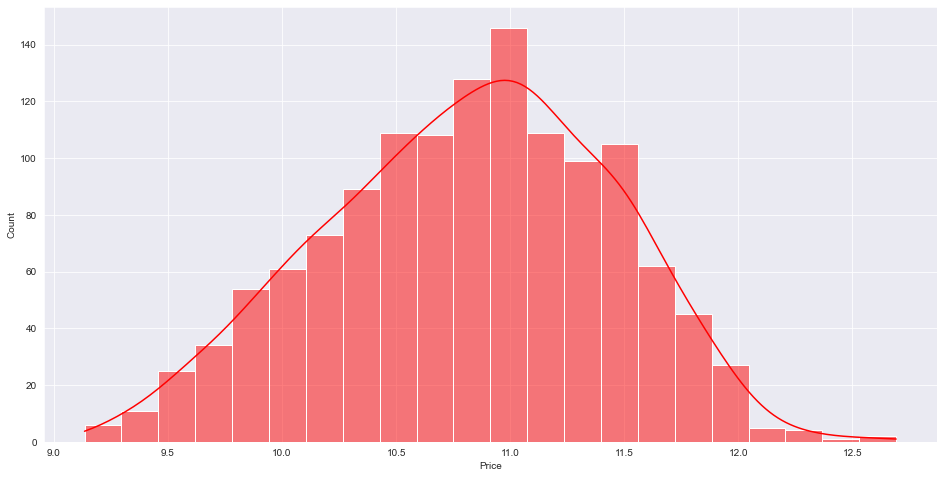

In [28]:
plt.figure(figsize=(16,8))
sns.histplot(np.log(df.Price),kde=True,color="red")
sns.set_style("darkgrid")
plt.show()

In [89]:
X = df.drop(columns=["Price"])
y = np.log(df["Price"])

In [90]:
X = X.values # removing feature names for onehotencoder

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Linear Regression

In [94]:
step_1 = ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],
     remainder="passthrough")
    
lr = LinearRegression()

pipe_lr = Pipeline([
    ('step1',step_1),
    ('step2',lr)
])

pipe_lr.fit(X_train,y_train)

y_pred = pipe_lr.predict(X_test)

print('r2_score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.8073277450155121
MAE:  0.21017827953019055


## KNN

In [95]:
step_1 = ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],
     remainder="passthrough")
    
knn = KNeighborsRegressor(n_neighbors=4)

pipe_knn = Pipeline([
    ('step1',step_1),
    ('step2',knn)
])

pipe_knn.fit(X_train,y_train)

y_pred = pipe_knn.predict(X_test)

print('r2_score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.7988801044775362
MAE:  0.19789062699372129


## Descision Tree

In [96]:
step_1 = ColumnTransformer(transformers=[
    ('col_trf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])],
     remainder="passthrough")
    
dtr = DecisionTreeRegressor()

pipe_dt = Pipeline([
    ('step1',step_1),
    ('step2',dtr)
])

pipe_dt.fit(X_train,y_train)

y_pred = pipe_dt.predict(X_test)

print('r2_score: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))

r2_score:  0.824640855874498
MAE:  0.19037249387508187


## Gradien Boost

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

gbr = GradientBoostingRegressor()

pipe_gb = Pipeline([
    ('step1',step1),
    ('step2',gbr)
])

pipe_gb.fit(X_train,y_train)

y_pred = pipe_gb.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8679201877492826
MAE 0.17507253969136322


## Adaboost

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

ada = AdaBoostRegressor()

pipe_ada = Pipeline([
    ('step1',step1),
    ('step2',ada)
])

pipe_ada.fit(X_train,y_train)

y_pred = pipe_ada.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8000207701526432
MAE 0.22807751991060127


## Extra Tree Regressor

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

ext = ExtraTreesRegressor()

pipe_xt = Pipeline([
    ('step1',step1),
    ('step2',ext)
])

pipe_xt.fit(X_train,y_train)

y_pred = pipe_xt.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8670922265635927
MAE 0.1620150933848377


## SVR

In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

svr = SVR()

pipe_svr = Pipeline([
    ('step1',step1),
    ('step2',svr)
])

pipe_svr.fit(X_train,y_train)

y_pred = pipe_svr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6110751844194183
MAE 0.29589619896726255


## XGBRegressor

In [101]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

xgb = XGBRegressor()

pipe_xg = Pipeline([
    ('step1',step1),
    ('step2',xgb)
])

pipe_xg.fit(X_train,y_train)

y_pred = pipe_xg.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.874921070569052
MAE 0.16308269537169992


## Random Forest

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

rfr = RandomForestRegressor(n_estimators=100,
                            random_state=67,
                            max_samples=0.6,
                            max_features=0.2,
                            max_depth=16)

pipe_rf = Pipeline([
    ('step1',step1),
    ('step2',rfr)
])

pipe_rf.fit(X_train,y_train)

y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9069277370654514
MAE 0.14773941840662555


In [103]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe_rf,open('pipe.pkl','wb'))